In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("~/ai_ml_dl/datasets/Titanic Data Set.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
data['Survived']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [36]:
data.Survived.unique()

array([0, 1])

In [37]:
data.Pclass.unique()

array([3, 2, 1])

In [38]:
data.Pclass.value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

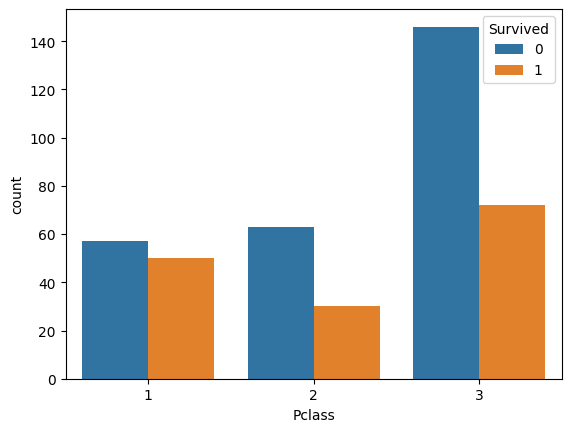

In [39]:
sns.countplot(data= data, x="Pclass",hue = "Survived")

In [40]:
grp_data = data.groupby(by=['Pclass']).agg({'Survived':'sum'})  

In [41]:
grp_data

,Survived
Pclass,
1,50
2,30
3,72


In [42]:
grp_data.index

Index([1, 2, 3], dtype='int64', name='Pclass')

In [43]:
data['Pclass'].value_counts().to_dict()

{3: 218, 1: 107, 2: 93}

In [44]:
grp_data.reset_index(inplace=True)
grp_data

,Pclass,Survived
0,1,50
1,2,30
2,3,72


In [45]:
grp_data['total'] = grp_data['Pclass'].map(data['Pclass'].value_counts().to_dict())
grp_data

,Pclass,Survived,total
0,1,50,107
1,2,30,93
2,3,72,218


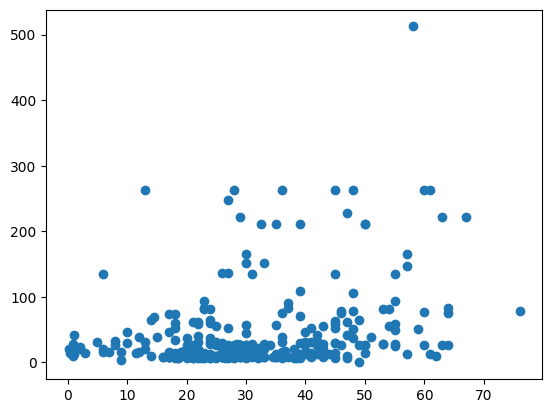

In [53]:
plt.scatter(data["Age"], data["Fare"])

In [54]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# K Fold Cross Validation 

In [1]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [5]:
for train, test in kf.split(X=data):
    print(len(train))
    print(len(test))
    # import model
    # model()
    # model.fit(train_data)
    # model.predict(test_data)
    # check accuracy

334
84
334
84
334
84
335
83
335
83


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
hdata = pd.read_csv("~/AI_ML_DL/datasets/heart_disease_uci_with treatment.csv")
hdata.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160,286,False,lv hypertrophy,108,True,1.5,flat,3,normal,2
2,3,67,Male,Cleveland,asymptomatic,120,229,False,lv hypertrophy,129,True,2.6,flat,2,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130,250,False,normal,187,False,3.5,downsloping,0,normal,0
4,5,41,Female,Cleveland,atypical angina,130,204,False,lv hypertrophy,172,False,1.4,upsloping,0,normal,0


In [6]:
hdata.isnull().sum()

id           0
age          0
sex          0
dataset      0
cp           0
trestbps     0
chol         0
fbs         90
restecg      7
thalch       0
exang        0
oldpeak      0
slope       15
ca           0
thal        23
num          0
dtype: int64

In [12]:
hdata.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
def out_bound(data, col_name):
    mean = data[col_name].mean()
    std =  data[col_name].std()
    ub =  mean + 3 * std; lb = mean - 3 * std